# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=15000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15000)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

2867

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city = cities[0]
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
city_data= requests.get(city_url).json()
pprint(city_data)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 65.6145, 'lon': -37.6368},
 'dt': 1611946390,
 'id': 3424607,
 'main': {'feels_like': 255.69,
          'humidity': 93,
          'pressure': 1015,
          'temp': 265.15,
          'temp_max': 265.15,
          'temp_min': 265.15},
 'name': 'Tasiilaq',
 'sys': {'country': 'GL',
         'id': 81,
         'sunrise': 1611919974,
         'sunset': 1611942860,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 9.26}}


In [4]:
name = city_data["name"]
lat = city_data['coord']['lat']
lng = city_data['coord']['lon']
max_temp = city_data['main']['temp_max']
humidity = city_data['main']['humidity']
cloudiness = city_data['weather'][0]['id']
wind_speed = city_data['wind']['speed']
date = city_data['dt']
country = city_data['sys']['country']
print(country)

GL


In [5]:
#Create dictionary and lists
global_weather = {}
names = []
lats = []
lngs = []
max_temps = []
humidities = []
clouds = []
speeds = []
dates = []
countries = []

for city in cities:
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    try:
    
        city_data = requests.get(city_url).json()
        names.append(city_data["name"])
        lats.append(city_data['coord']['lat'])
        lngs.append(city_data['coord']['lon'])
        max_temps.append(city_data['main']['temp_max'])
        humidities.append(city_data['main']['humidity'])
        clouds.append(city_data['weather'][0]['id'])
        speeds.append(city_data['wind']['speed'])
        countries.append(city_data['sys']['country'])
        dates.append(city_data['dt'])
    
    except: 
        pass  

global_weather['Name'] = names
global_weather['Latitude'] = lats
global_weather['Longitude'] = lngs
global_weather['Max Temp'] = max_temps
global_weather['Humidity'] = humidities
global_weather['Cloudiness'] = clouds
global_weather['Wind Speed'] = speeds
global_weather['Country'] = countries
global_weather['Date'] = dates

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_summary = pd.DataFrame(global_weather)
pd.to_numeric(weather_summary['Latitude']).astype(float)
pd.to_numeric(weather_summary['Longitude']).astype(float)
pd.to_numeric(weather_summary['Max Temp']).astype(float)
pd.to_numeric(weather_summary['Humidity']).astype(float)
pd.to_numeric(weather_summary['Cloudiness']).astype(float)
pd.to_numeric(weather_summary['Wind Speed']).astype(float)
weather_summary

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,265.15,93,804,9.26,GL,1611946390
1,Dikson,73.5069,80.5464,236.95,84,804,2.53,RU,1611946391
2,Alofi,-19.0595,-169.9187,298.15,94,501,4.12,NU,1611946391
3,Port Alfred,-33.5906,26.8910,291.48,89,800,0.89,ZA,1611946159
4,Salinópolis,-0.6136,-47.3561,301.52,73,804,6.24,BR,1611946392
...,...,...,...,...,...,...,...,...,...
2647,Qurayyat,31.3318,37.3428,281.15,53,803,5.14,SA,1611947090
2648,Stavrovo,56.1331,40.0130,270.77,98,804,5.68,RU,1611947090
2649,Yazoo City,32.8551,-90.4056,286.15,43,800,2.37,US,1611947011
2650,Santa Lucía,27.9117,-15.5407,294.26,78,800,3.09,ES,1611947090


In [7]:
weather_summary.to_csv("Output Data/cities.csv")

In [8]:
weather_summary

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,265.15,93,804,9.26,GL,1611946390
1,Dikson,73.5069,80.5464,236.95,84,804,2.53,RU,1611946391
2,Alofi,-19.0595,-169.9187,298.15,94,501,4.12,NU,1611946391
3,Port Alfred,-33.5906,26.8910,291.48,89,800,0.89,ZA,1611946159
4,Salinópolis,-0.6136,-47.3561,301.52,73,804,6.24,BR,1611946392
...,...,...,...,...,...,...,...,...,...
2647,Qurayyat,31.3318,37.3428,281.15,53,803,5.14,SA,1611947090
2648,Stavrovo,56.1331,40.0130,270.77,98,804,5.68,RU,1611947090
2649,Yazoo City,32.8551,-90.4056,286.15,43,800,2.37,US,1611947011
2650,Santa Lucía,27.9117,-15.5407,294.26,78,800,3.09,ES,1611947090


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_summary.drop(weather_summary[weather_summary['Humidity'] >100].index, inplace = False)
clean_city_data

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,265.15,93,804,9.26,GL,1611946390
1,Dikson,73.5069,80.5464,236.95,84,804,2.53,RU,1611946391
2,Alofi,-19.0595,-169.9187,298.15,94,501,4.12,NU,1611946391
3,Port Alfred,-33.5906,26.8910,291.48,89,800,0.89,ZA,1611946159
4,Salinópolis,-0.6136,-47.3561,301.52,73,804,6.24,BR,1611946392
...,...,...,...,...,...,...,...,...,...
2647,Qurayyat,31.3318,37.3428,281.15,53,803,5.14,SA,1611947090
2648,Stavrovo,56.1331,40.0130,270.77,98,804,5.68,RU,1611947090
2649,Yazoo City,32.8551,-90.4056,286.15,43,800,2.37,US,1611947011
2650,Santa Lucía,27.9117,-15.5407,294.26,78,800,3.09,ES,1611947090


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
# challenge: create custom function, "template," so I can run just one line of code (include savefig)

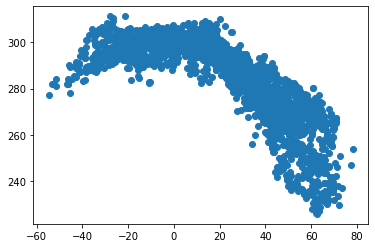

In [12]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temp'])


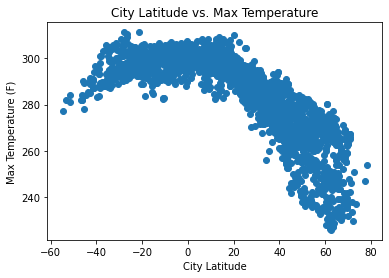

In [13]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temp'])
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

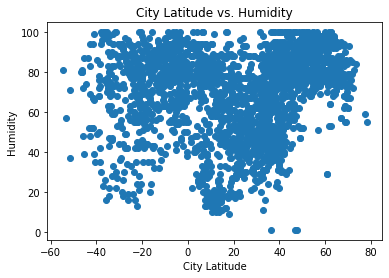

In [14]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity'])
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

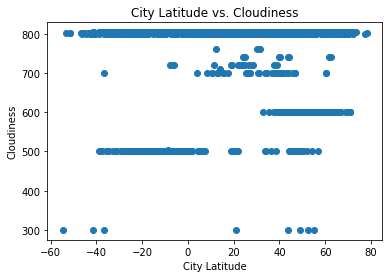

In [15]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Cloudiness'])
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

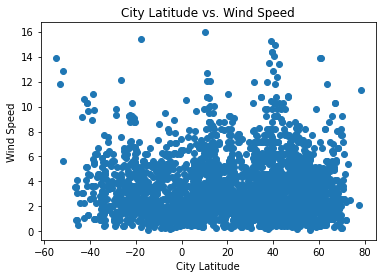

In [16]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [17]:
northern_df = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) > 0, :]
southern_df = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

308.06411706444135
-0.8194046899519187


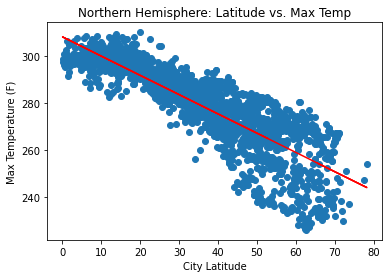

Regression =  -0.82 + 308.06
R-Value = -0.8500338267041511


In [33]:
x = northern_df['Latitude']
y = northern_df['Max Temp']
result = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Max Temp')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

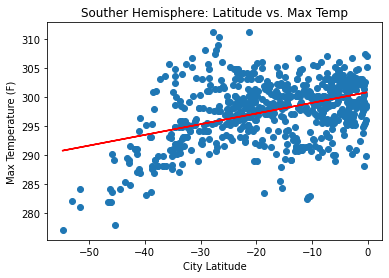

Regression =  -0.82 + 308.06
R-Value = -0.8500338267041511


In [34]:
x = southern_df['Latitude']
y = southern_df['Max Temp']
result = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Souther Hemisphere: Latitude vs. Max Temp')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

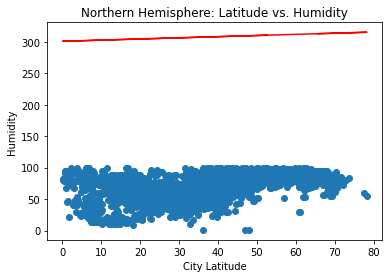

Regression =  0.55 + 49.89
R-Value = 0.4520482323455991


In [35]:
x = northern_df['Latitude']
y = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Latitude vs. Humidity')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

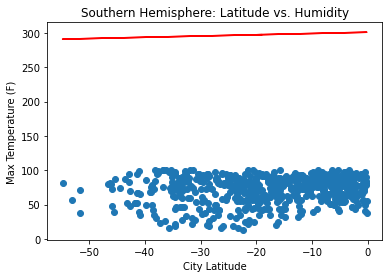

Regression =  0.26 + 76.99
R-Value = 0.16404570911491972


In [36]:
x = southern_df['Latitude']
y = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Humidity')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

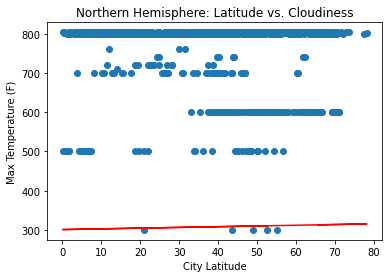

Regression =  -0.61 + 796.85
R-Value = -0.1516775572113993


In [37]:
x = northern_df['Latitude']
y = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

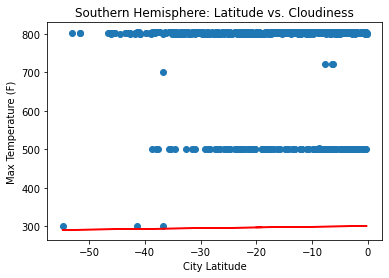

Regression =  -1.66 + 702.33
R-Value = -0.15307269810228177


In [38]:
x = southern_df['Latitude']
y = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

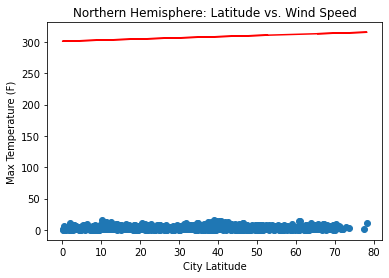

Regression =  0.0 + 3.56
R-Value = 0.00028767023729303035


In [39]:
x = northern_df['Latitude']
y = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

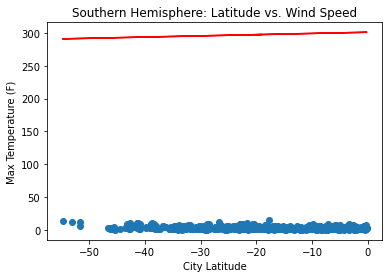

Regression =  -0.04 + 2.59
R-Value = -0.21837583107062447


In [40]:
x = southern_df['Latitude']
y = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f" {(round(slope,2))} + {(round(intercept,2))}"
plt.scatter(x, y)
plt.plot(x, result.intercept + result.slope*x, 'r')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")